In [178]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [179]:
img = cv2.imread("C:\Chat-Bot\image_31.jpeg")
img.shape

(256, 197, 3)

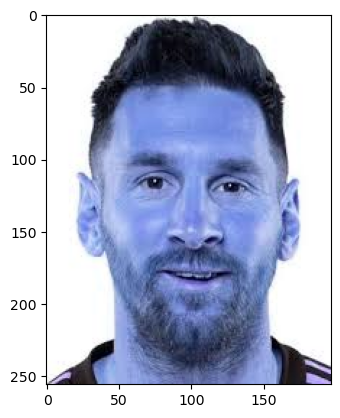

In [180]:
plt.imshow(img)

In [181]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(256, 197)

In [182]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [249, 240, 254, ..., 155,  70,  11],
       [252, 246, 142, ..., 198, 181, 153],
       [218, 144, 136, ..., 205, 205, 195]], dtype=uint8)

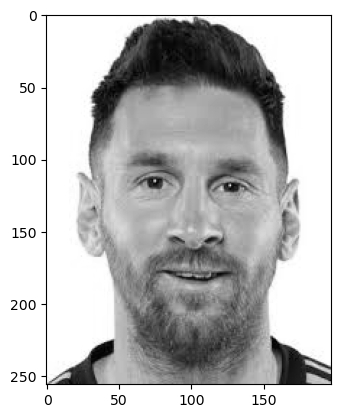

In [183]:
plt.imshow(gray, cmap='gray')

In [184]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 22,  56, 154, 154]])

In [185]:
(x,y,w,h) = faces[0]
x,y,w,h

(22, 56, 154, 154)

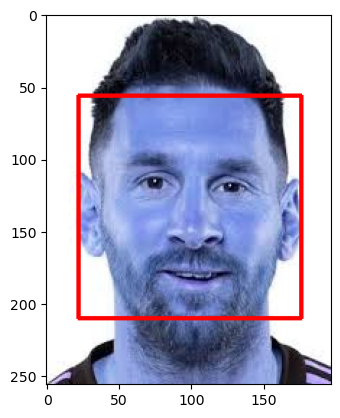

In [186]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

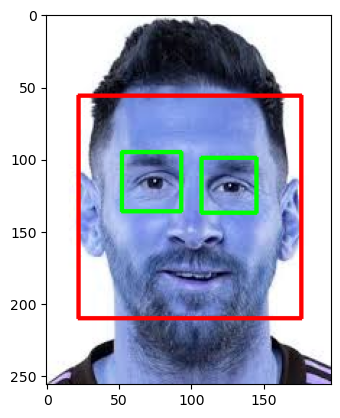

In [187]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


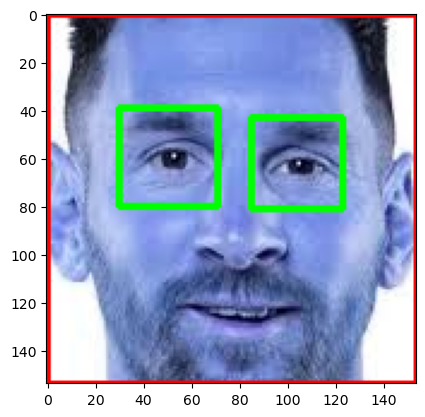

In [188]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [189]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

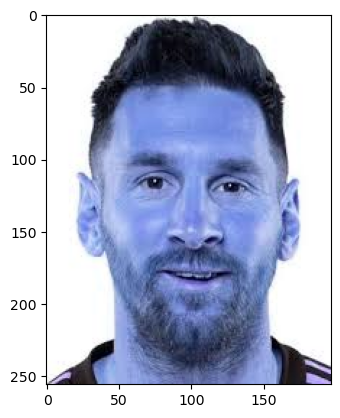

In [190]:
original_image = cv2.imread("C:\Chat-Bot\image_31.jpeg")
plt.imshow(original_image)

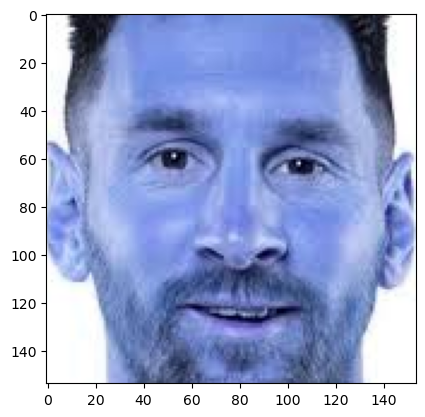

In [191]:
cropped_image = get_cropped_image_if_2_eyes("C:\Chat-Bot\image_31.jpeg")
plt.imshow(cropped_image)

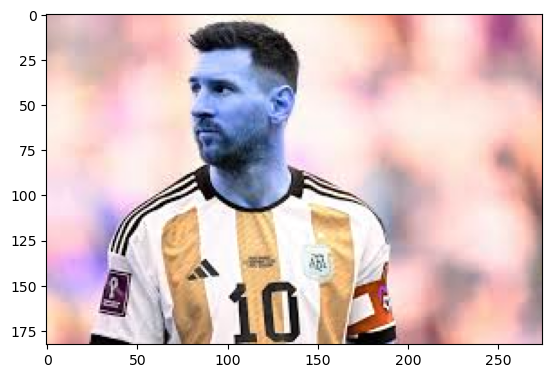

In [192]:
org_image_obstructed = cv2.imread("C:\Chat-Bot\image_33.jpeg")
plt.imshow(org_image_obstructed)

In [193]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes("C:\Chat-Bot\image_33.jpeg")
cropped_image_no_2_eyes

In [254]:
path_to_data = "C:\chat-data\py\DataScience\CelebrityFaceRecognition\model\dataset"
path_to_cr_data = "C:\chat-data\py\DataScience\CelebrityFaceRecognition\model\dataset\cropped"

In [4]:
path_to_data = "C:\chat-data\py\DataScience\CelebrityFaceRecognition\model\dataset"
path_to_cr_data = "C:\chat-data\py\DataScience\CelebrityFaceRecognition\model\dataset\cropped"

import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped',
 'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\lionel_messi',
 'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\maria_sharapova',
 'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\roger_federer',
 'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\serena_williams',
 'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\virat_kohli']

In [256]:
img_dirs

['C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped',
 'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\lionel_messi',
 'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\maria_sharapova',
 'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\roger_federer',
 'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\serena_williams',
 'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\virat_kohli']

In [5]:
path_to_data = "C:\chat-data\py\DataScience\CelebrityFaceRecognition\model\dataset"
path_to_cr_data = "C:\chat-data\py\DataScience\CelebrityFaceRecognition\model\dataset\cropped"

import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [10]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
        
        
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

path_to_data = "C:\chat-data\py\DataScience\CelebrityFaceRecognition\model\dataset"
path_to_cr_data = "C:\chat-data\py\DataScience\CelebrityFaceRecognition\model\dataset\cropped"

import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)



import os
import cv2  # Assuming cv2 is used for image processing

cropped_image_dirs = []
celebrity_file_names_dict = {}

# Assuming `path_to_cr_data` and `img_dirs` are correctly set
path_to_cr_data = r"C:\chat-data\py\DataScience\CelebrityFaceRecognition\model\dataset\cropped"  # Example path, adjust accordingly

for img_dir in img_dirs:
    count = 1
    # Get the celebrity name by splitting the directory path correctly
    celebrity_name = os.path.basename(img_dir)
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        # Assuming `get_cropped_image_if_2_eyes` is a function that processes images
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            # Use os.path.join to form the full path
            cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
                
            # Form the file name and path correctly
            cropped_file_name = f"{celebrity_name}{count}.png"
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
            
            # Save the cropped image using OpenCV
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1


cropped
lionel_messi
Generating cropped images in folder:  C:\chat-data\py\DataScience\CelebrityFaceRecognition\model\dataset\cropped\lionel_messi
maria_sharapova
Generating cropped images in folder:  C:\chat-data\py\DataScience\CelebrityFaceRecognition\model\dataset\cropped\maria_sharapova
roger_federer
Generating cropped images in folder:  C:\chat-data\py\DataScience\CelebrityFaceRecognition\model\dataset\cropped\roger_federer
serena_williams
Generating cropped images in folder:  C:\chat-data\py\DataScience\CelebrityFaceRecognition\model\dataset\cropped\serena_williams
virat_kohli
Generating cropped images in folder:  C:\chat-data\py\DataScience\CelebrityFaceRecognition\model\dataset\cropped\virat_kohli


In [11]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [12]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

NameError: name 'cropped_image' is not defined

In [264]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\lionel_messi': ['C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\lionel_messi\\lionel_messi1.png',
  'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\lionel_messi\\lionel_messi10.png',
  'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\lionel_messi\\lionel_messi11.png',
  'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\lionel_messi\\lionel_messi13.png',
  'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\lionel_messi\\lionel_messi14.png',
  'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\lionel_messi\\lionel_messi15.png',
  'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\lionel_messi\\lionel_messi16.png',
  'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecogni

In [265]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\lionel_messi': 0,
 'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\maria_sharapova': 1,
 'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\roger_federer': 2,
 'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\serena_williams': 3,
 'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\virat_kohli': 4}

In [266]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [267]:
len(X[0])

4096

In [268]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [269]:
y[0]

0

In [270]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(163, 4096)

In [271]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7804878048780488

In [273]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.88      0.70      0.78        10
           2       0.71      0.71      0.71         7
           3       0.44      0.80      0.57         5
           4       1.00      0.92      0.96        12

    accuracy                           0.78        41
   macro avg       0.77      0.77      0.76        41
weighted avg       0.82      0.78      0.79        41



In [288]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
# model_params = {
#     'svm': {
#         'model': svm.SVC(gamma='auto',probability=True),
#         'params' : {
#             'svc__C': [1,10,100,1000],
#             'svc__kernel': ['rbf','linear']
#         }  
#     },
#     'random_forest': {
#         'model': RandomForestClassifier(),
#         'params' : {
#             'randomforestclassifier__n_estimators': [1,5,10]
#         }
#     },
#     'logistic_regression' : {
#         'model': LogisticRegression(solver='liblinear',multi_class='auto'),
#         'params': {
#             'logisticregression__C': [1,5,10]
#         }
#     }
# }
model_params = {
    'svm': {
        'model': svm.SVC(probability=True),
        'params': {
            'svc__C': [0.1, 1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
            'svc__gamma': ['scale', 'auto'],  # Using 'scale' which is better than 'auto'
            'svc__degree': [2, 3, 4],  # Only used for polynomial kernel
            'svc__class_weight': [None, 'balanced']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [50, 100, 200],  # Higher n_estimators for more stability
            'randomforestclassifier__max_depth': [10, 20, None],  # None allows the trees to grow as deep as possible
            'randomforestclassifier__min_samples_split': [2, 5, 10],  # Control tree complexity
            'randomforestclassifier__min_samples_leaf': [1, 2, 4],  # Control tree complexity
            'randomforestclassifier__bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
            'randomforestclassifier__class_weight': [None, 'balanced']  # Balance the class weights
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [0.01, 0.1, 1, 10, 100],  # A wider range of C values
            'logisticregression__penalty': ['l1', 'l2'],  # Experiment with L1 and L2 regularization
            'logisticregression__class_weight': [None, 'balanced']  # Balance class weights
        }
    }
}


In [289]:
# scores = []
# best_estimators = {}
# import pandas as pd
# for algo, mp in model_params.items():
#     pipe = make_pipeline(StandardScaler(), mp['model'])
#     clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
#     clf.fit(X_train, y_train)
#     scores.append({
#         'model': algo,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_
#     })
#     best_estimators[algo] = clf.best_estimator_
    
# df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
# df

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scores = []
best_estimators = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
    best_estimators[algo] = clf.best_estimator_

# Convert results to DataFrame for easy viewing
import pandas as pd
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(df)


KeyboardInterrupt: 

In [276]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [277]:
best_estimators['svm'].score(X_test,y_test)

0.8048780487804879

In [278]:
best_estimators['random_forest'].score(X_test,y_test)

0.6341463414634146

In [279]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8780487804878049

In [281]:
best_clf = best_estimators['logistic_regression']

In [282]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  0,  0,  1,  0],
       [ 0,  9,  0,  0,  1],
       [ 0,  0,  6,  1,  0],
       [ 0,  1,  0,  4,  0],
       [ 0,  1,  0,  0, 11]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

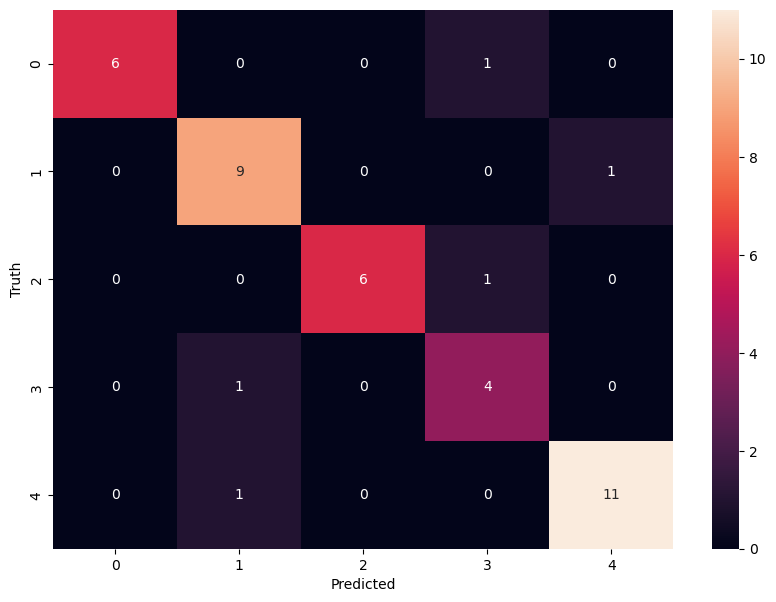

In [283]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [284]:
class_dict

{'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\lionel_messi': 0,
 'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\maria_sharapova': 1,
 'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\roger_federer': 2,
 'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\serena_williams': 3,
 'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\virat_kohli': 4}

In [285]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [286]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [2]:
# Install necessary libraries
!pip install keras tensorflow pillow numpy
!pip install joblib

# Import necessary libraries
import numpy as np
import joblib
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt



In [225]:
import joblib

# Load the model using joblib
#model = joblib.load('./saved_model.pkl')


In [226]:
class_names = ['Celebrity 1', 'Celebrity 2', 'Celebrity 3', 'Celebrity 4', 'Celebrity 5']

In [227]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Assuming VGG16 input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)  # Preprocessing for VGG16
    return img_array


In [228]:
def classify_image(img_path):
    img_array = preprocess_image(img_path)
    
    # Predict probabilities for each class
    probabilities = model.predict(img_array)
    
    # Flatten the output and get probabilities
    probabilities = probabilities.flatten()
    
    # Zip probabilities with class names and sort by confidence
    class_probabilities = sorted(
        zip(class_names, probabilities),
        key=lambda x: x[1],
        reverse=True
    )
    
    return class_probabilities


In [229]:
def display_image_and_results(img_path):
    # Classify the image
    class_probabilities = classify_image(img_path)
    
    # Load and display the image
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    # Display probabilities
    print("Predicted Probabilities:")
    for celeb, prob in class_probabilities:
        print(f"{celeb}: {prob * 100:.2f}%")


In [233]:
# # Test the classification
# image_path = r'C:\chat-data\py\DataScience\CelebrityFaceRecognition\model\test_images\sharapova1.jpg'  # Replace with actual image path
# display_image_and_results(image_path)


In [ ]:
# Install necessary libraries
!pip install keras tensorflow pillow numpy
!pip install joblib

# Import necessary libraries
import numpy as np
import joblib
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt



In [3]:
import joblib
import numpy as np
import cv2
import json
import os
from sklearn.preprocessing import StandardScaler

# Load the trained model
model = joblib.load('saved_model.pkl')

# Load the class dictionary
with open("class_dictionary.json", "r") as f:
    class_dict = json.load(f)

# Reverse the class dictionary to map class indices to names
class_names = {v: k for k, v in class_dict.items()}
# Preprocessing function for the image
def preprocess_image(image_path):
    """
    Preprocess the image for the SVM classifier: resizing, extracting wavelet features,
    and flattening the image.
    """
    img = cv2.imread(image_path)
    scalled_raw_img = cv2.resize(img, (32, 32))  # Resize image to 32x32
    img_har = w2d(img, 'db1', 5)  # Apply wavelet transform (you already have w2d implemented)
    scalled_img_har = cv2.resize(img_har, (32, 32))  # Resize wavelet-transformed image

    # Combine raw image and wavelet transformed image
    combined_img = np.vstack((scalled_raw_img.reshape(32*32*3, 1), scalled_img_har.reshape(32*32, 1)))

    # Return as a flattened feature vector
    return combined_img.flatten().reshape(1, -1)

# Function to classify the image
def classify_image(image_path):
    """
    Classify an image and return the probabilities for each celebrity.
    """
    preprocessed_image = preprocess_image(image_path)
    
    # Predict probabilities using the trained model
    probabilities = model.predict_proba(preprocessed_image)[0]
    
    return probabilities

# Function to display classification results
def display_classification_results(image_path):
    """
    Display the classification results with probabilities for each celebrity.
    """
    probabilities = classify_image(image_path)

    # Display the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Display probabilities for each celebrity
    print("Class probabilities:")
#   for idx, prob in enumerate(probabilities):
#         if idx == 0:
#             print(f"Lionel Messi: {prob * 100:.2f}%")
#         if idx == 1:
#             print(f"Maria Sharapova: {prob * 100:.2f}%")
#         if idx == 2:
#             print(f"Roger Federer: {prob * 100:.2f}%")
#         if idx == 3:
#             print(f"Serena Williams: {prob * 100:.2f}%")
#         if idx == 4:
#             print(f"Virat Kohli: {prob * 100:.2f}%")
    for idx, (image_path_key, celebrity_name) in enumerate(d2.items()):
        prob = probabilities[idx]
        print(f"{celebrity_name}: {prob * 100:.2f}%")
          
          
    

    # Get the predicted class
    predicted_class_idx = np.argmax(probabilities)
    print(f"\nPredicted Celebrity: {d2[class_names[predicted_class_idx]]}")
    
d2={'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\lionel_messi': 'Lionel Messi', 
    'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\maria_sharapova': 'Maria Sharapova' ,
    'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\roger_federer': 'Roger Federer', 
    'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\serena_williams': 'Serena Williams',
    'C:\\chat-data\\py\\DataScience\\CelebrityFaceRecognition\\model\\dataset\\cropped\\virat_kohli': 'Virat Kohli'}

# Provide the path to the image you want to classify
image_path = r'C:\chat-data\py\DataScience\CelebrityFaceRecognition\model\test_images\sharapova1.JPG'

# Display classification results
display_classification_results(image_path)


NameError: name 'w2d' is not defined

In [13]:
import pickle
from sklearn.metrics import accuracy_score

# Step 1: Load the model from the .pkl file
with open('saved_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Step 2: Load your test dataset (assuming X_test and y_test are ready)
# X_test -> Features of your test set
# y_test -> True labels of your test set

# Step 3: Make predictions
y_pred = model.predict(X_test)

# Step 4: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


UnpicklingError: invalid load key, '\x0a'.